<a href="https://colab.research.google.com/github/prithvidev/Logistic-Regression-Problem/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [6]:
y.shape

(303,)

In [7]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

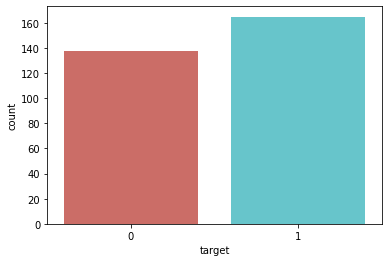

In [8]:
#countplot
# It simply shows the number of occurrences of an item based on a certain type of category.
sns.countplot(x='target',data=df,palette='hls')

In [9]:
X=pd.DataFrame(df.iloc[:,:-1])
y=pd.DataFrame(df.iloc[:,-1])

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
pred=log.predict(X_test)

In [13]:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
print("The Accuracy of this Model is:",accuracy_score(Y_test,pred))

The Accuracy of this Model is: 0.8852459016393442


In [14]:
#Confusion Matrix
#A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") 
#on a set of test data for which the true values are known.
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,pred))

[[25  4]
 [ 3 29]]


In [15]:
log.predict([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]])

array([1])

In [19]:
log.predict([[57,0,0,140,241,0,1,123,1,0.2,1,0,3]])

array([0])